In [105]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime as dt
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from fbprophet import Prophet
import pmdarima as pm
import math

In [107]:
tech_sector_pd = pd.read_csv('KU_tech_sector_export.csv')
tech_sector_pd['date'] = pd.to_datetime(tech_sector_pd['date'])

In [108]:
tech_sector_pd = tech_sector_pd.set_index('date')

In [109]:
df_apple = tech_sector_pd[['apple']]

Text(0.5, 1.0, 'Apple Closing Price')

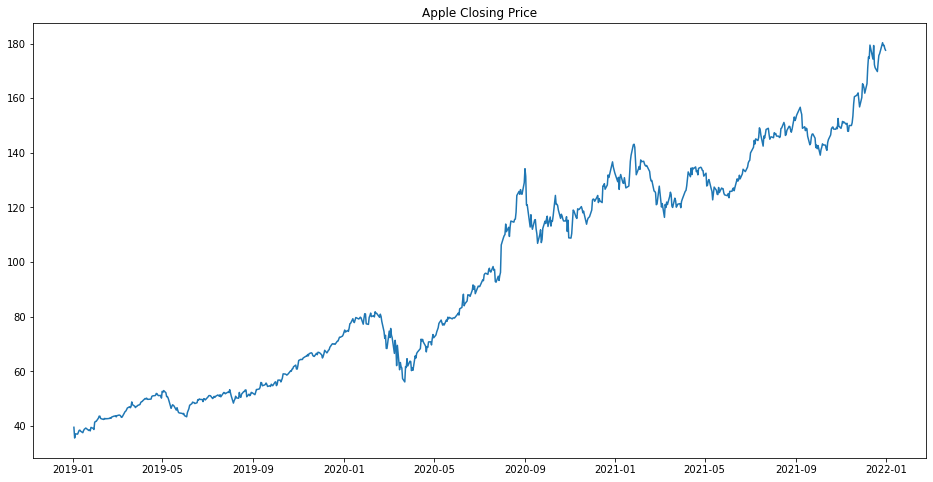

In [110]:
#plot
plt.figure(figsize=(16,8))
plt.plot(tech_sector_pd['apple'], label='Close Price History')
plt.title('Apple Closing Price')

Text(0.5, 1.0, 'S&P Closing Price')

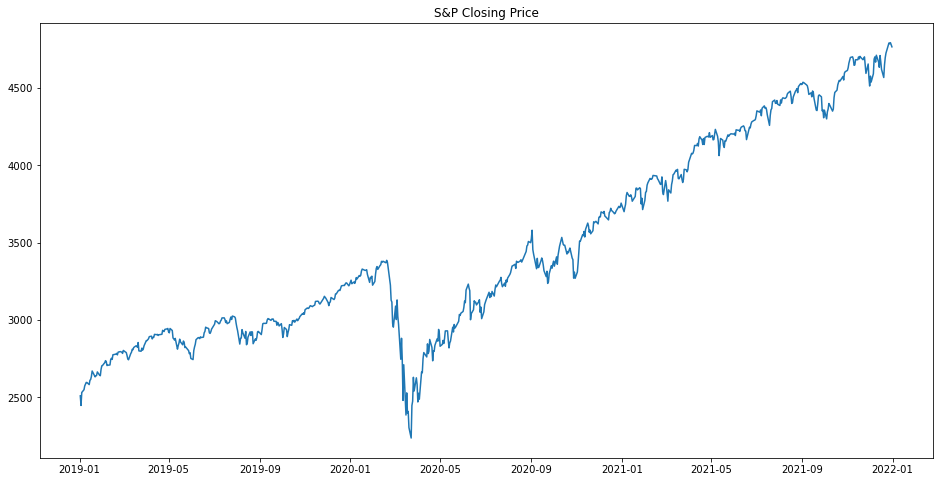

In [111]:
plt.figure(figsize=(16,8))
plt.plot(tech_sector_pd['spstock'], label='Close Price History')
plt.title('S&P Closing Price')

Text(0.5, 1.0, 'Tech Closing Price')

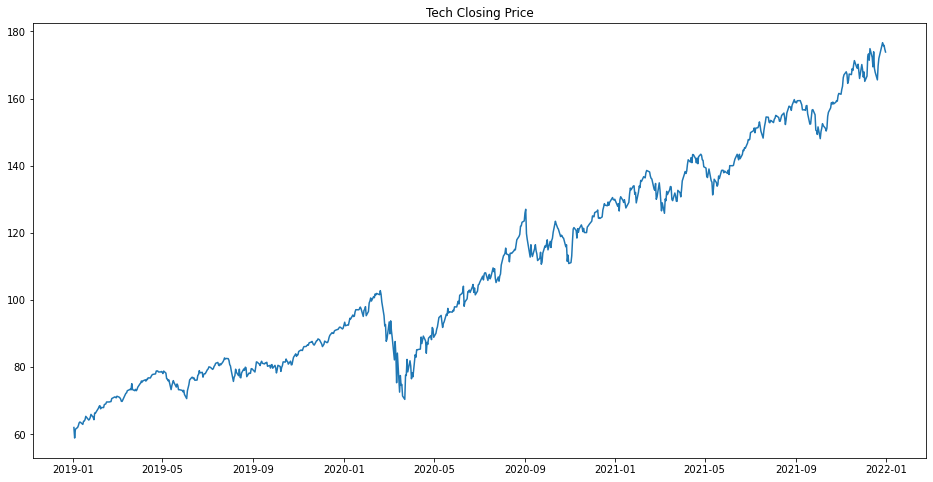

In [112]:
plt.figure(figsize=(16,8))
plt.plot(tech_sector_pd['tech_sector'], label='Close Price History')
plt.title('Tech Closing Price')

<AxesSubplot:ylabel='Density'>

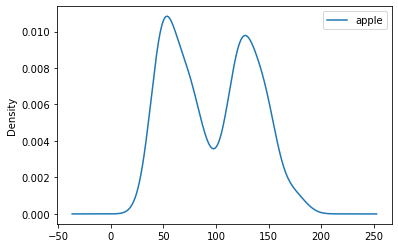

In [113]:
df_apple_close = df_apple[['apple']]
df_apple_close.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

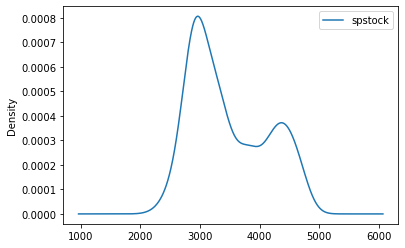

In [114]:
df_sp_close = tech_sector_pd[['spstock']]
df_sp_close.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

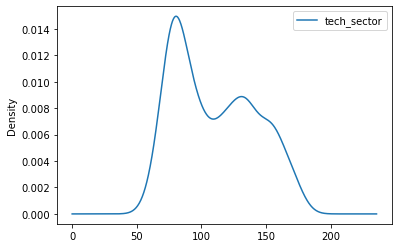

In [115]:
df_tech_close = tech_sector_pd[['tech_sector']]
df_tech_close.plot(kind='kde')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


Text(0.5, 0.98, 'Apple')

<Figure size 432x288 with 0 Axes>

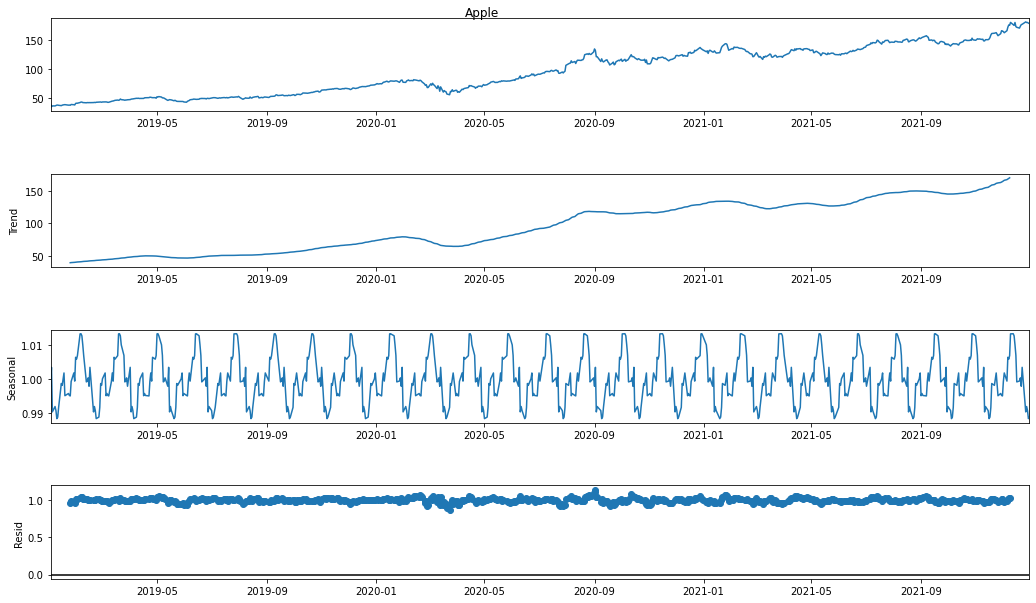

In [116]:
#Looking at trend and seasonality from time series
result = seasonal_decompose(df_apple_close, model='multiplicative', freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)
fig.suptitle('Apple')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


Text(0.5, 0.98, 'Tech Sector')

<Figure size 432x288 with 0 Axes>

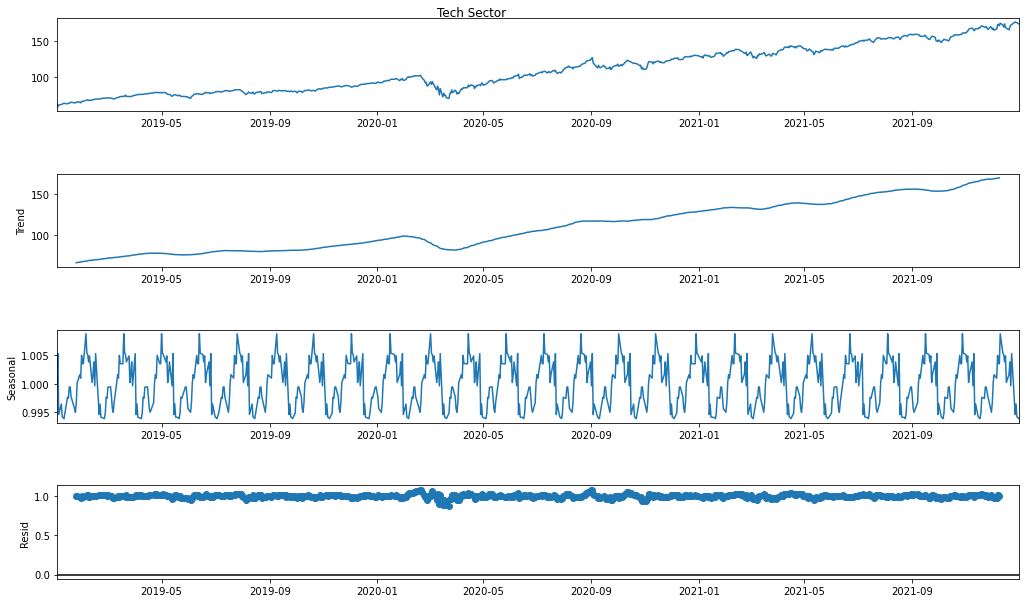

In [117]:
#Looking at trend and seasonality from time series
result = seasonal_decompose(df_tech_close, model='multiplicative', freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)
fig.suptitle('Tech Sector')


Since data is not stationary we will preform log transformation to eliminate trend

In [118]:
df_apple_log = np.log(df_apple_close)

In [119]:
df_tech_log = np.log(df_tech_close)

Split data into train and test sets

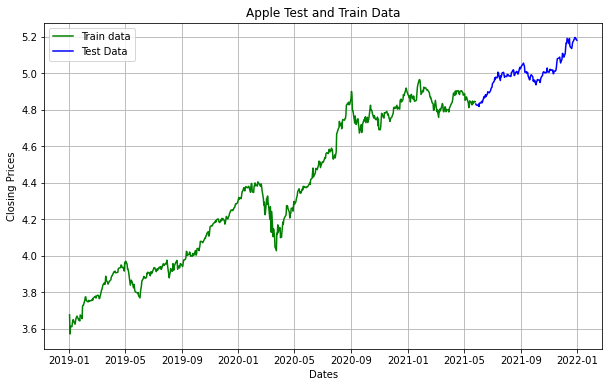

In [120]:
apple_train_data= pd.DataFrame(df_apple_log.iloc[:int(df_apple_log.shape[0]*0.8)])
apple_test_data = pd.DataFrame(df_apple_log.iloc[int(df_apple_log.shape[0]*0.80):])
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(apple_train_data, 'Green', label='Train data')
plt.plot(apple_test_data, 'blue',  label='Test Data')
plt.title('Apple Test and Train Data')
plt.legend()

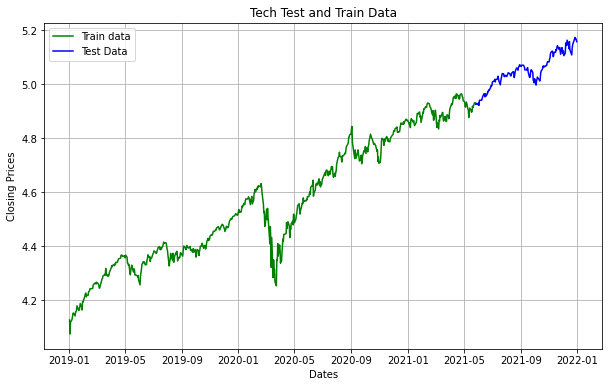

In [121]:
tech_train_data= df_tech_log.iloc[:int(df_tech_log.shape[0]*0.8)]
tech_test_data = df_tech_log.iloc[int(df_tech_log.shape[0]*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(tech_train_data, 'Green', label='Train data')
plt.plot(tech_test_data, 'blue',  label='Test Data')
plt.title('Tech Test and Train Data')
plt.legend()

This Machine Learning Model will run a linear regression, ARIMA, and a Facebook Prophet Model
-some limitations of these models will be they do not take into accoutn current world sitations (like COVID impacts on the economy)

Linear Regression Model

In [122]:
df_linear_apple = tech_sector_pd[['apple', 'spstock']]

In [123]:
df_linear_tech = tech_sector_pd[['tech_sector', 'spstock']]

In [124]:
# for linear regression model we need an x_train value, and a y_train value
X_train, X_test, y_train, y_test = train_test_split(df_linear_apple[['apple']], df_linear_apple[['spstock']], test_size=.2)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Error Statistics for Apple Linear Regression')
print('MSE: ' + str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('MAPE: ' + str(mape))

Error Statistics for Apple Linear Regression
MSE: 44843.93834998846
MAE: 181.38651811272553
RMSE: 211.7638740436821
MAPE: spstock    0.052723
dtype: float64


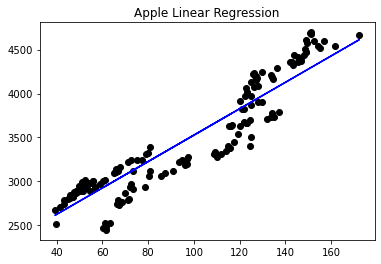

In [52]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue')
plt.title('Apple Linear Regression')
plt.show()

In [125]:
# for linear regression model we need an x_train value, and a y_train value
X_train, X_test, y_train, y_test = train_test_split(df_linear_tech[['tech_sector']], df_linear_apple[['spstock']], test_size=.2)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Error Statistics for Tech Linear Regression')
print('MSE: ' + str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('MAPE: ' + str(mape))

Error Statistics for Tech Linear Regression
MSE: 18417.793640267006
MAE: 115.78815579007498
RMSE: 135.71217204166695
MAPE: spstock    0.035755
dtype: float64


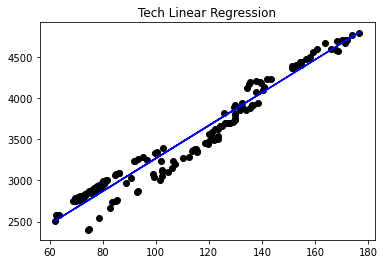

In [126]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue')
plt.title('Tech Linear Regression')
plt.show()

ARIMA Model

For Apple

In [127]:
#Determining optimal parameters
arima_model_param = pm.auto_arima(apple_train_data, d=1, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_p=6, max_order=None , trace=True)

arima_model_param.fit(apple_train_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2852.520, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2833.087, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2857.740, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2855.585, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2830.878, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2856.070, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2856.050, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2854.069, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2853.120, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.349 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [128]:
#Modeling
arima_model = ARIMA(apple_train_data, order=(1,1,0))
arima_fitted = arima_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.37060D+00    |proj g|=  3.32236D-01

At iterate    5    f= -2.37062D+00    |proj g|=  7.00837D-02

At iterate   10    f= -2.37065D+00    |proj g|=  2.12351D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     31      1     0     0   1.279D-05  -2.371D+00
  F =  -2.3706456645958842     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

In [129]:
#Forecast
arima_forecast, se, conf = arima_fitted.forecast(len(apple_test_data), alpha=0.05)

arima_fc_series = pd.Series(arima_forecast, index=apple_test_data.index)
lower_series = pd.Series(conf[:,0], index=apple_test_data.index)
upper_series = pd.Series(conf[:,1], index=apple_test_data.index)

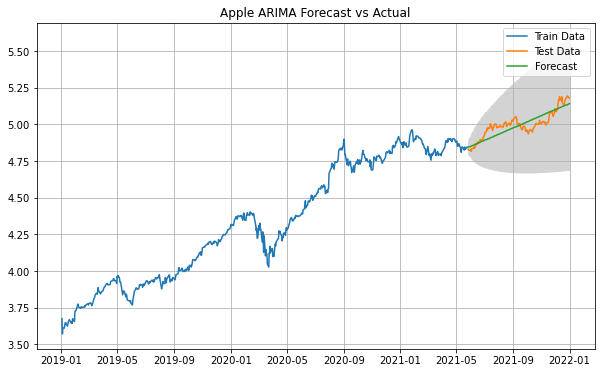

In [130]:
#ARIMA Plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(apple_train_data, label='Train Data')
plt.plot(apple_test_data, label='Test Data')
plt.plot(arima_fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='lightgrey')
plt.title('Apple ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [131]:
# ARIMA Model Statistics
print('Error Statistics for Apple ARIMA Model')
mse = mean_squared_error(apple_test_data, arima_forecast)
print('MSE: ' + str(mse))
mae = mean_absolute_error(apple_test_data, arima_forecast)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(apple_test_data, arima_forecast))
print('RMSE: '+str(rmse))

Error Statistics for Apple ARIMA Model
MSE: 0.0022844363619663145
MAE: 0.0419817010864507
RMSE: 0.047795777658348804


ARIMA Model for Tech Sector

In [132]:
#Determining optimal parameters
arima_model_param = pm.auto_arima(tech_train_data, d=1, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_p=6, max_order=None , trace=True)

arima_model_param.fit(tech_train_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3179.825, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3074.921, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3138.661, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3126.861, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3073.934, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3138.997, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3136.915, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-3134.774, Time=0.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-3135.252, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3137.719, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3136.939, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3136.491, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-3133.182, Time=0.55 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-3134.298, Time=0.12 sec

Best model:  ARIMA

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [133]:
#Modeling
arima_model = ARIMA(tech_train_data, order=(2,1,2))
arima_fitted = arima_model.fit()

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.64170D+00    |proj g|=  7.98821D-02

At iterate    5    f= -2.64170D+00    |proj g|=  5.73848D-02

At iterate   10    f= -2.64176D+00    |proj g|=  6.28197D-01

At iterate   15    f= -2.64194D+00    |proj g|=  8.46700D-03

At iterate   20    f= -2.64242D+00    |proj g|=  1.46989D-01

At iterate   25    f= -2.64281D+00    |proj g|=  4.83080D-03

At iterate   30    f= -2.64282D+00    |proj g|=  8.77540D-02

At iterate   35    f= -2.64283D+00    |proj g|=  4.75966D-03

At iterate   40    f= -2.64283D+00    |proj g|=  6.38130D-03

At iterate   45    f= -2.64284D+00    |proj g|=  1.82605D-03

At iterate   50    f= -2.64284D+00    |proj g|=  1.52767D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [134]:
#Forecast
arima_forecast, se, conf = arima_fitted.forecast(len(tech_test_data), alpha=0.05)

arima_fc_series = pd.Series(arima_forecast, index=tech_test_data.index)
lower_series = pd.Series(conf[:,0], index=tech_test_data.index)
upper_series = pd.Series(conf[:,1], index=tech_test_data.index)

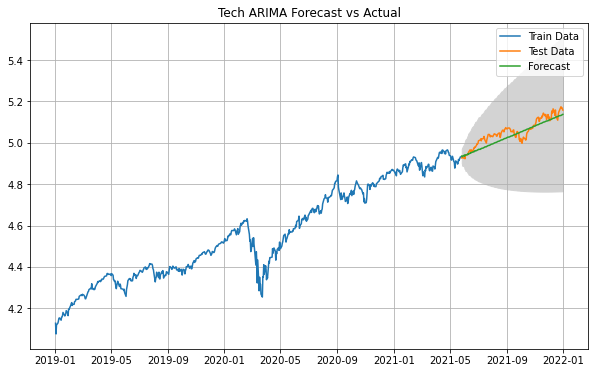

In [135]:
#ARIMA Plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tech_train_data, label='Train Data')
plt.plot(tech_test_data, label='Test Data')
plt.plot(arima_fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='lightgrey')
plt.title('Tech ARIMA Forecast vs Actual')
plt.legend()
plt.show()

Facebook Prophet Model for Apple

In [141]:

prophet_data = pd.DataFrame()
prophet_data['y'] = df_apple_log['apple']
prophet_data['ds'] = tech_sector_pd.index


#train and validation
prophet_train = prophet_data[:int(prophet_data.shape[0]*0.80)]
prophet_test = prophet_data[int(prophet_data.shape[0]*0.80):]

#fit the model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(prophet_train)

#predictions
close_prices = prophet_model.make_future_dataframe(periods=212)
forecast = prophet_model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.23024
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2572.78   0.000747485       620.524           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2595.3   0.000294246       1826.88      0.6393      0.6393      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2642.5    0.00326795       1808.16       4.602      0.4602      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2665.82   0.000970188       540.408           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2669.96   0.000345003       1391.64      0.3282      0.3282      564   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [142]:
forecast = forecast.set_index('ds')
forecast = forecast.rename(columns={'yhat':'Prediction'})
forecast = forecast[forecast.index.dayofweek < 5]
forecast = forecast.loc['2021-05-27':'2021-12-31']

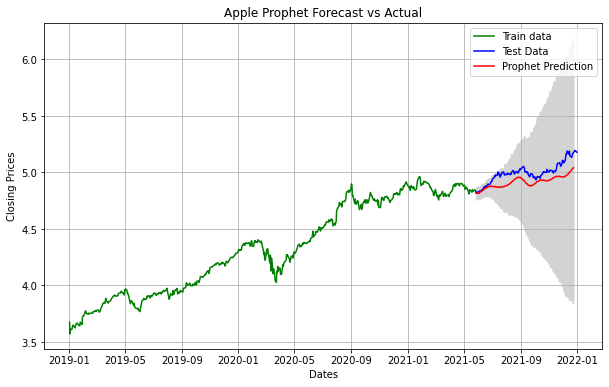

In [143]:
#plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(apple_train_data, 'Green', label='Train data')
plt.plot(apple_test_data, 'blue',  label='Test Data')
plt.plot(forecast['Prediction'], 'Red', label='Prophet Prediction')
plt.fill_between(forecast['yhat_lower'].index, forecast['yhat_lower'], forecast['yhat_upper'], color='lightgrey')
plt.title('Apple Prophet Forecast vs Actual')
plt.legend()

In [144]:
#Prophet Model Statistics
print('Error Statistics for Apple Prophet Model')
mse = mean_squared_error(apple_test_data, forecast['Prediction'])
print('MSE: ' + str(mse))
mae = mean_absolute_error(apple_test_data, forecast['Prediction'])
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(apple_test_data, forecast['Prediction']))
print('PRMSE: '+str(rmse))

Error Statistics for Apple Prophet Model
MSE: 0.009456177999958126
MAE: 0.08498700562706235
PRMSE: 0.09724288148732599


In [145]:
prophet_data = pd.DataFrame()
prophet_data['y'] = df_tech_log['tech_sector']
prophet_data['ds'] = tech_sector_pd.index

#train and validation
prophet_train = prophet_data[:int(prophet_data.shape[0]*0.80)]
prophet_test = prophet_data[int(prophet_data.shape[0]*0.80):]

#fit the model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(prophet_train)

#predictions
close_prices = prophet_model.make_future_dataframe(periods=212)
forecast = prophet_model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.0755
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2694.34     0.0157375       2557.43           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2770.86    0.00103004       991.445           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2807.2    0.00184741       1876.19           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2844.91    0.00220445       990.696          10           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2854.71     0.0391582       3474.16           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha   

In [146]:
forecast = forecast.set_index('ds')
forecast = forecast.rename(columns={'yhat':'Prediction'})
forecast = forecast[forecast.index.dayofweek < 5]
forecast = forecast.loc['2021-05-27':'2021-12-31']

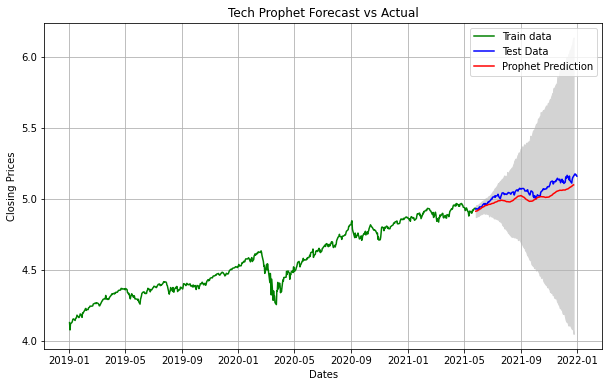

In [147]:
#plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(tech_train_data, 'Green', label='Train data')
plt.plot(tech_test_data, 'blue',  label='Test Data')
plt.plot(forecast['Prediction'], 'Red', label='Prophet Prediction')
plt.fill_between(forecast['yhat_lower'].index, forecast['yhat_lower'], forecast['yhat_upper'], color='lightgrey')
plt.title('Tech Prophet Forecast vs Actual')
plt.legend()

In [148]:
#Prophet Model Statistics
print('Error Statistics for Tech Prophet Model')
mse = mean_squared_error(tech_test_data, forecast['Prediction'])
print('MSE: ' + str(mse))
mae = mean_absolute_error(tech_test_data, forecast['Prediction'])
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(tech_test_data, forecast['Prediction']))
print('RMSE: '+str(rmse))

Error Statistics for Tech Prophet Model
MSE: 0.003190264271096764
MAE: 0.05064152225137527
RMSE: 0.05648242444421772
